# System Recommendation - MovieLens (Playground)

### Import Library

In [191]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import User

In [2]:
user_df = pd.read_csv('../../data/movielens/u.user', sep='|', header=None, names=['Index', 'Age', 'Gender', 'Occupation', 'Zip code'])

In [3]:
user_df.head()

,Index,Age,Gender,Occupation,Zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Shape of Data

In [4]:
user_df.shape

(943, 5)

#### Average User Age

In [112]:
user_df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,943.0,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0


#### Comparison User Gender

<AxesSubplot:>

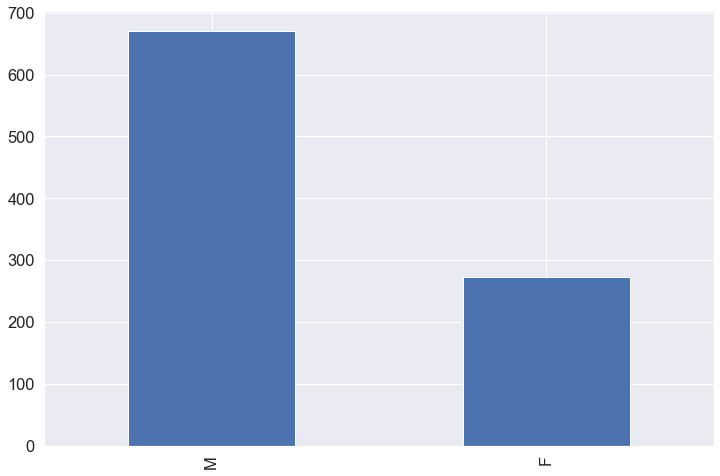

In [195]:
user_df['Gender'].value_counts().plot(kind='bar')

#### Comparison User Occupation

<AxesSubplot:>

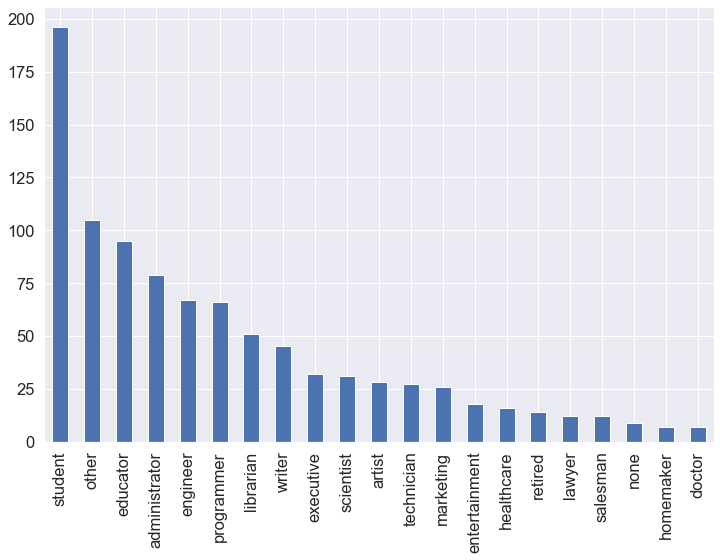

In [194]:
user_df['Occupation'].value_counts().plot(kind='bar')

#### Encode User Gender Into Binary

In [8]:
user_gender = np.array(user_df['Gender'])

In [15]:
total_user = len(user_gender)

In [16]:
encoded_user_gender = np.where(np.array(user_gender) == 'M', 0, 1)
print("Total number of users:", total_user)
print("\nEncoded user gender shape:", encoded_user_gender.shape)
print("\n", encoded_user_gender)

Total number of users: 943

Encoded user gender shape: (943,)

 [0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1

#### Import User Occupation

In [20]:
occupation_df = pd.read_csv('../../data/movielens/u.occupation', sep='|', header=None)

In [21]:
occupation_df

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [27]:
total_occupation = len(occupation_df)
print("Total number of occupations", total_occupation)

Total number of occupations 21


#### Encode User Occupation Into Binary

In [48]:
user_occupation_matrix = np.zeros((total_user, total_occupation))
print("Zero matrix shape for user occupation:", user_occupation_matrix.shape)

Zero matrix shape for user occupation: (943, 21)


#### Assign User Occupation Value For Each Possible Occupation

In [50]:
for i in np.arange(total_user):
    ### Get Occupation Index From List of Occupation
    occupation_index = occupation_df.loc[:, 0].tolist().index(user_df.loc[i, 'Occupation'])
    user_occupation_matrix[i][occupation_index] = 1

In [51]:
print("User occupation matrix after encoded:\n\n", user_occupation_matrix)

User occupation matrix after encoded:

 [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


#### Concatenate User Attribute

In [70]:
np.expand_dims(user_df['Age'].to_numpy(), axis=1).shape

(943, 1)

In [72]:
np.expand_dims(encoded_user_gender, axis=1).shape

(943, 1)

In [73]:
user_occupation_matrix.shape

(943, 21)

In [76]:
user_attribute = np.concatenate((np.expand_dims(user_df['Age'].to_numpy(), axis=1), np.expand_dims(encoded_user_gender, axis=1), user_occupation_matrix), axis=1)

In [79]:
print("Final user attribute shape:", user_attribute.shape)

Final user attribute shape: (943, 23)


#### Import Movie

In [119]:
genre_df = pd.read_csv('../../data/movielens/u.genre', sep='|', header=None)

In [123]:
genre_df

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [124]:
movie_df = pd.read_csv('../../data/movielens/u.item', sep='|', header=None, encoding='latin-1', names=['Index', 'Title', 'Release', 'The NaN Column', 'Imdb'] + genre_df[0].tolist())

In [125]:
movie_df

,Index,Title,Release,The NaN Column,Imdb,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
total_movie = len(movie_df)

#### Total Movies Per Genre

<AxesSubplot:>

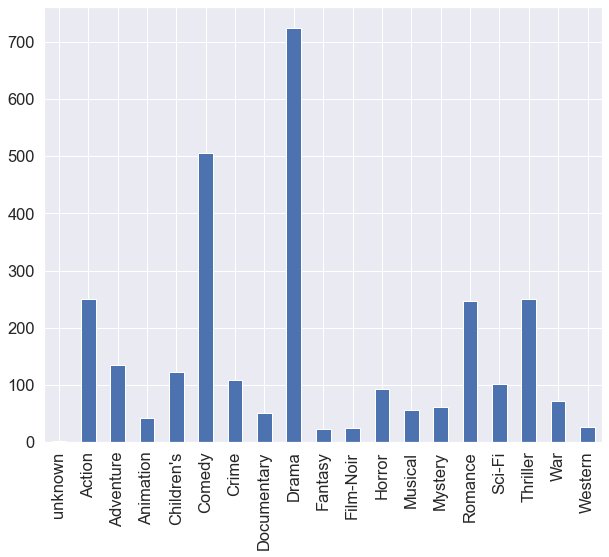

In [193]:
movie_df.loc[:, 'unknown':].sum().plot(kind='bar', figsize=(10, 8))

#### Import Training & Test Set

Training and test set consist of user id, movie id, rating, and time attribute.\
Training set consist of 80K data.\
Test set consist of 20K data.

In [163]:
training_df = pd.read_csv('../../data/movielens/u1.base', sep='\t', header=None, names=['User Id', 'Movie Id', 'Rating', 'Timestamp'])

In [164]:
training_df

,User Id,Movie Id,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [165]:
test_df = pd.read_csv('../../data/movielens/u1.test', sep='\t', header=None, names=['User Id', 'Movie Id', 'Rating', 'Timestamp'])

#### Create Matrix User x Movies

Create matrix with size user (as row) x size movie (as column).\
Each cell consist of user rating value for that particular movie.\
\
Example:  

|        | Movie-1 | Movie-2 |
| ------ | ------- | ------- |
| User-1 | 4       | 3       |
| User-2 | 5       | 2.5     |  
  
And so on...


In [174]:
def create_matrix_user_movie_rating(data, nb_users, nb_movies):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:,1][data[:,0] == id_users]
        id_ratings = data[:,2][data[:,0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return np.array(new_data)

#### Convert Training Set

In [175]:
train_set = create_matrix_user_movie_rating(np.array(training_df), total_user, total_movie)

In [182]:
train_set.shape

(943, 1682)

In [183]:
pd.DataFrame(train_set)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert Test Set

In [177]:
test_set = create_matrix_user_movie_rating(np.array(test_df), total_user, total_movie)

In [185]:
test_set.shape

(943, 1682)

In [184]:
pd.DataFrame(test_set)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Visualize Histogram Number of Movies Watched per User

##### Training set

In [188]:
num_watched_movies_train = np.where(train_set > 0, 1, 0)

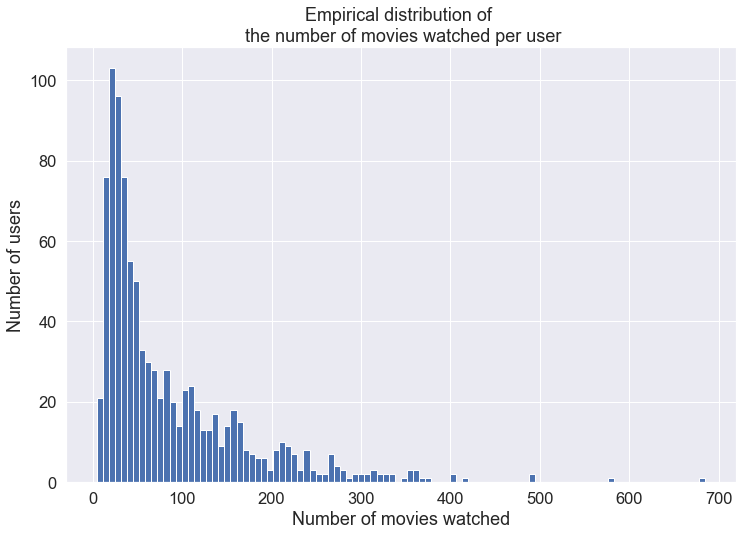

In [196]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.title('Empirical distribution of \n the number of movies watched per user')
plt.xlabel('Number of movies watched')
plt.ylabel('Number of users')
plt.hist(np.sum(num_watched_movies_train, axis=1), 100);